# House Prices - Regression Techniques
    Xiaoqing Li 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## 1. Load Data

In [2]:
All_train = pd.read_csv('D:/ML_projects/House prices/train.csv')
All_test = pd.read_csv('D:/ML_projects/House prices/test.csv')

## 2. Take a Look at the Training Data

In [3]:
All_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
All_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 3. Looking for Correlations

In [5]:
# split numerical variables and object variables
obj_train = All_train.select_dtypes(exclude=['int64','float64'])
num_train = All_train.select_dtypes(exclude=['object'])

Calculate the standard correlation coefficient between every pair of numerical attributes using the $curr()$ method.

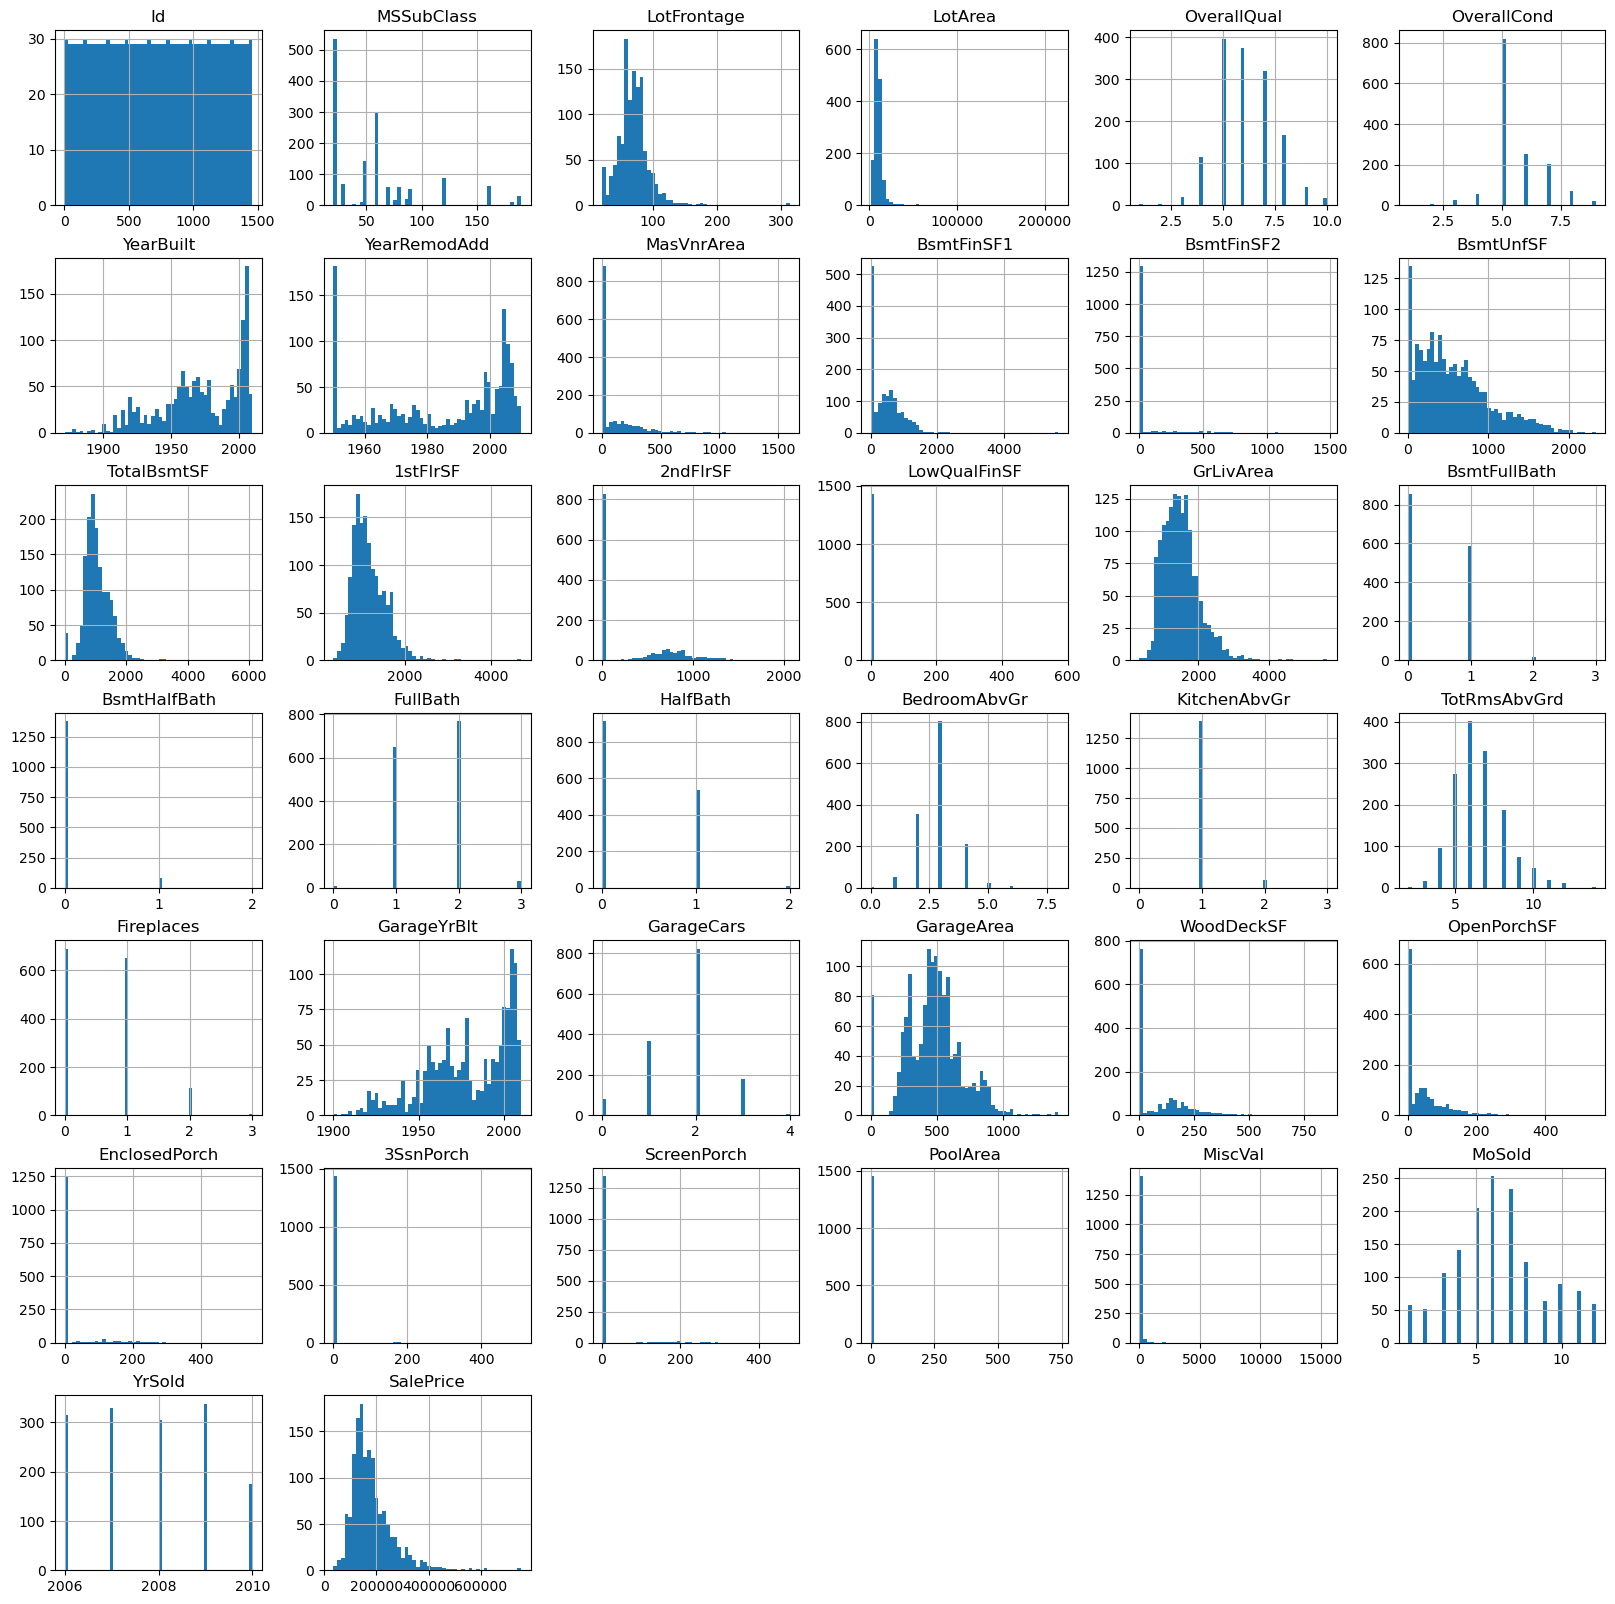

In [6]:
num_train.hist(bins=50,figsize=(20,20))
plt.show()

In [7]:
corr_matrix = num_train.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

The correlation between certain attributes and SalePrice is quite low, such as 'BsmtFinSF2' and 'BsmtHalfBath'.

In [8]:
low_corr_list = [i for i in corr_matrix['SalePrice'].index 
                 if abs(corr_matrix['SalePrice'][i])<0.1]

In [9]:
len(low_corr_list)

11

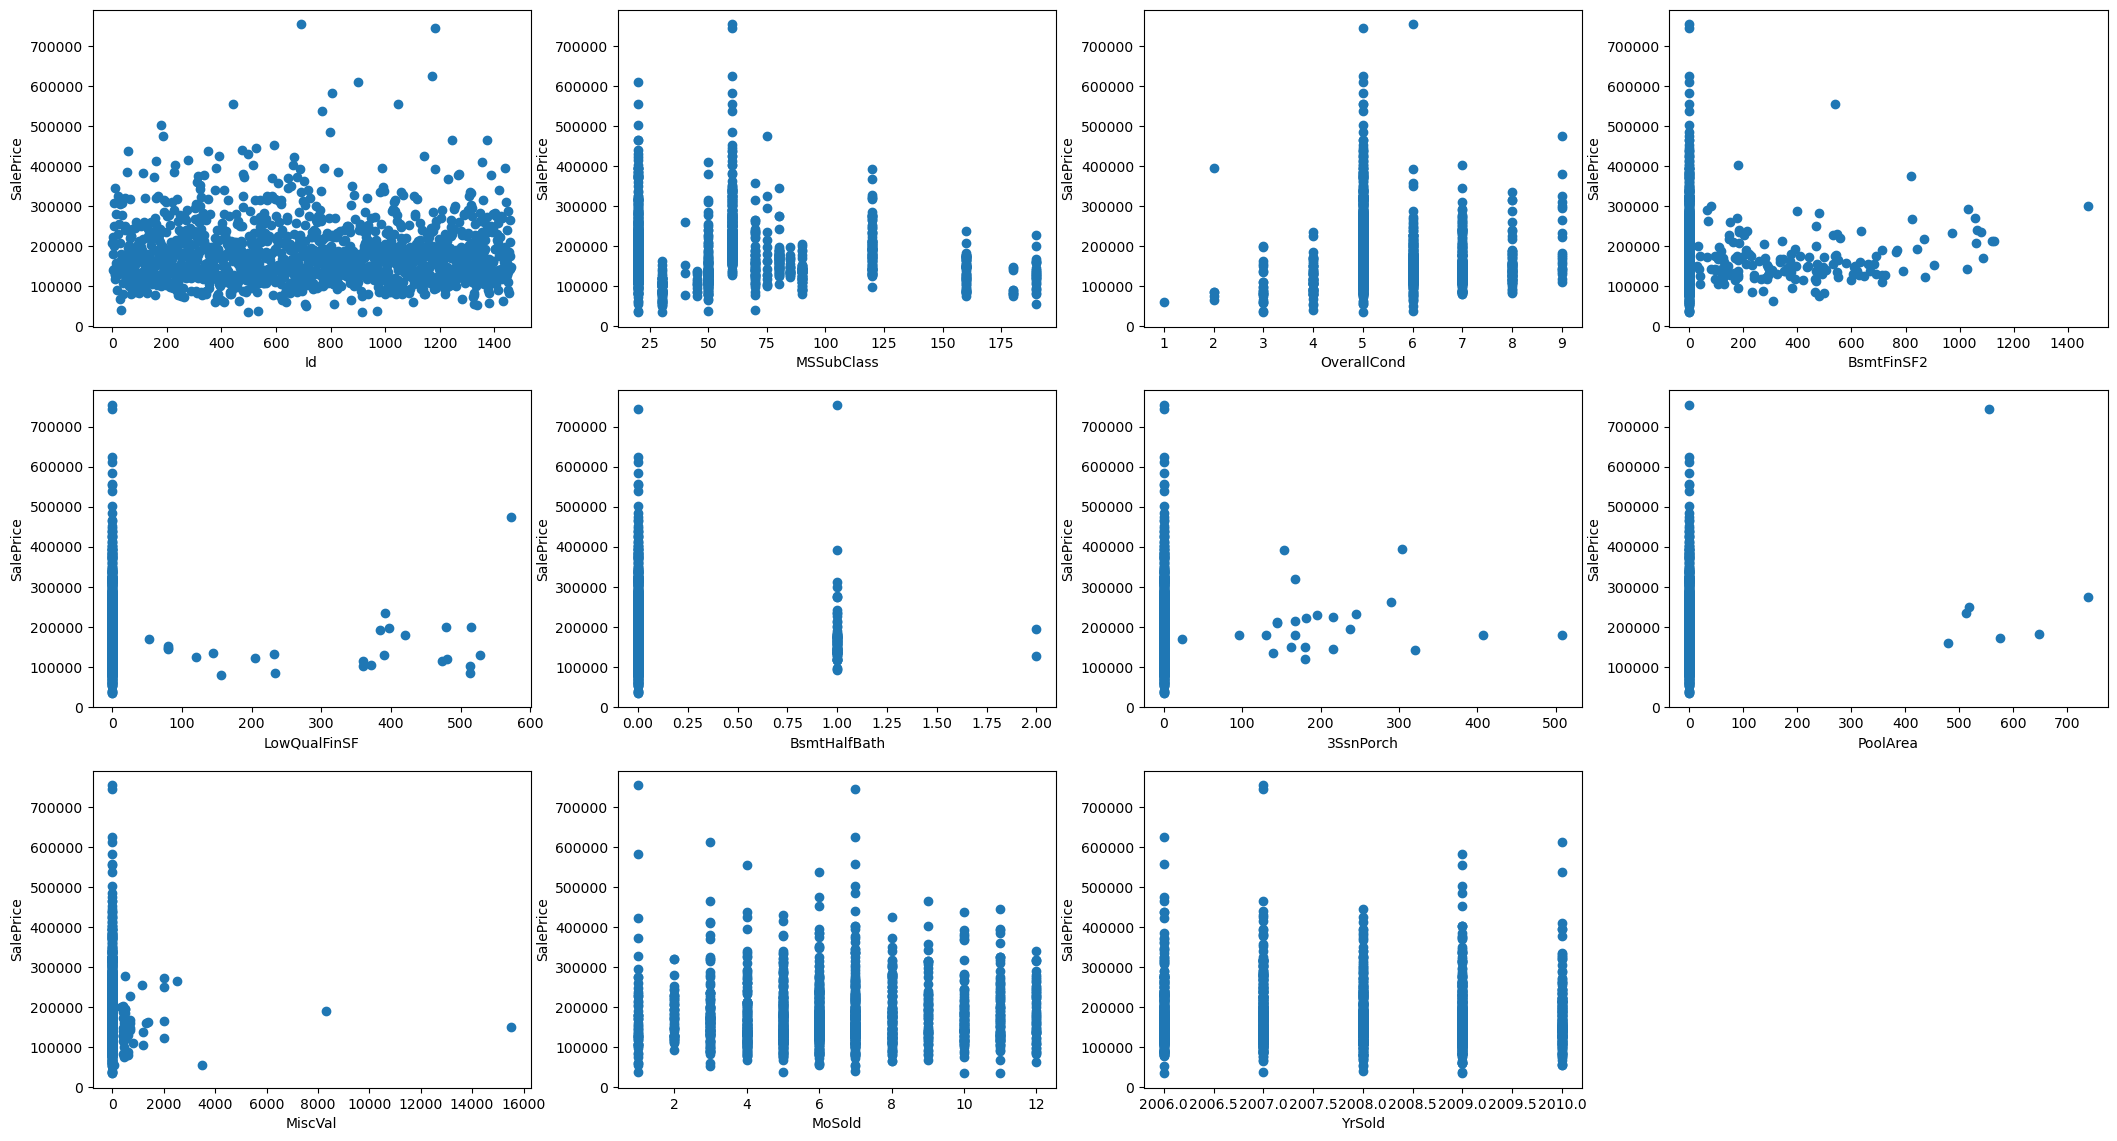

In [10]:
plt.figure(figsize=(26,14))
for j in range(len(low_corr_list)):
    plt.subplot(3,4,j+1)
    plt.scatter(num_train[low_corr_list[j]], num_train['SalePrice'])
    plt.xlabel(low_corr_list[j])
    plt.ylabel('SalePrice')
plt.show()

These weakly correlated attributes should be ignored.

Assign each unique value in each categorical attribute to a different integer using ordinal encoding, therefore the correlation between each categorical attribute and the SalePrice could be calculated. 

In [11]:
from sklearn.preprocessing import OrdinalEncoder
obj_train_ord = obj_train.copy()
ordinal_encoder = OrdinalEncoder()
obj_train_ord = pd.DataFrame(ordinal_encoder.fit_transform(obj_train), 
                             index = obj_train.index, columns = obj_train.columns)

In [12]:
obj_train_ord_ = pd.concat([obj_train_ord, All_train['SalePrice']], axis = 1)

In [13]:
corr_matrix_obj = obj_train_ord_.corr()
corr_matrix_obj['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
Alley            0.534319
Foundation       0.382479
CentralAir       0.251328
Electrical       0.234990
PavedDrive       0.231357
RoofStyle        0.222405
SaleCondition    0.213092
Neighborhood     0.210851
HouseStyle       0.180163
GarageCond       0.150576
RoofMatl         0.132383
ExterCond        0.117303
Functional       0.115328
GarageQual       0.115119
MiscFeature      0.109485
Exterior2nd      0.103766
Exterior1st      0.103551
Condition1       0.091155
BsmtCond         0.060362
LandSlope        0.051152
BsmtFinType2     0.041161
Street           0.041036
MasVnrType       0.016810
LandContour      0.015453
Condition2       0.007513
Utilities       -0.014314
SaleType        -0.054911
BsmtFinType1    -0.064531
LotConfig       -0.067396
BldgType        -0.085591
Heating         -0.098812
FireplaceQu     -0.166817
MSZoning        -0.166872
Fence           -0.172999
LotShape        -0.255580
BsmtExposure    -0.285290
GarageType      -0.358279
HeatingQC   

In [14]:
low_corr_list_obj = [i for i in corr_matrix_obj['SalePrice'].index 
                     if abs(corr_matrix_obj['SalePrice'][i])<0.1]

In [15]:
len(low_corr_list_obj)

14

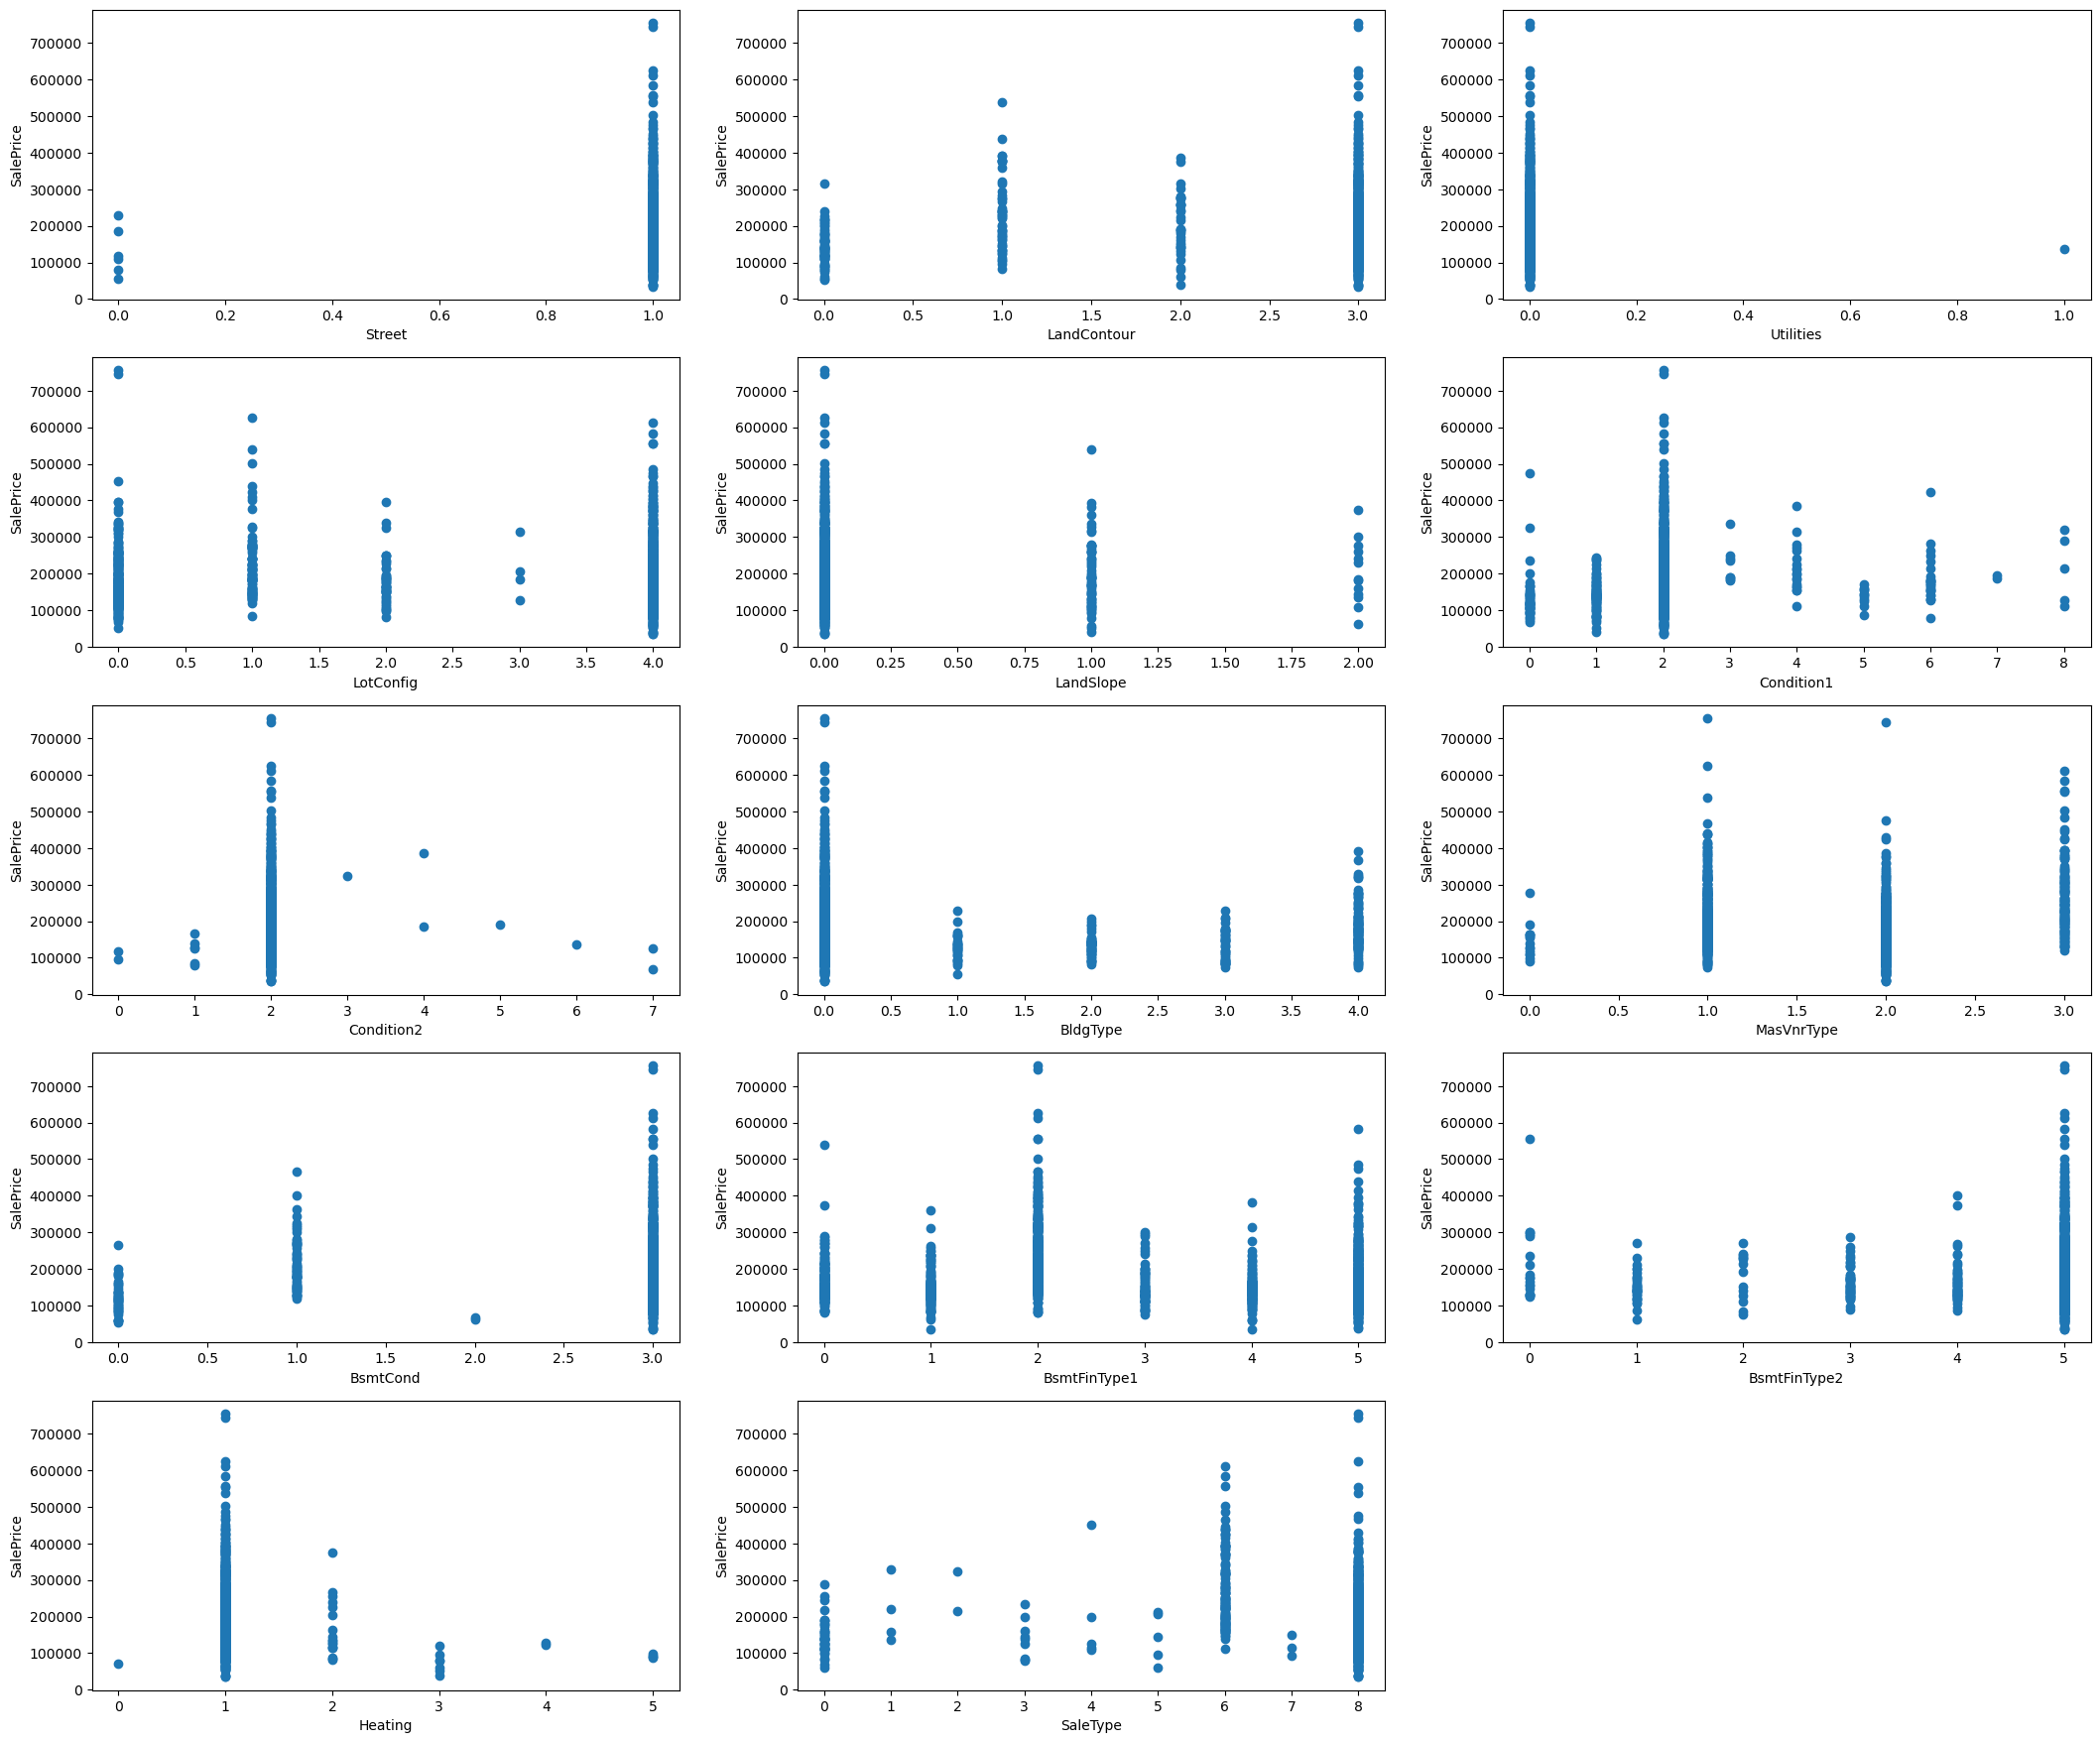

In [16]:
plt.figure(figsize=(26,22))
for j in range(len(low_corr_list_obj)):
    plt.subplot(5,3,j+1)
    plt.scatter(obj_train_ord_[low_corr_list_obj[j]], obj_train_ord_['SalePrice'])
    plt.xlabel(low_corr_list_obj[j])
    plt.ylabel('SalePrice')
plt.show()

## 4. Data Preprocessing

Procedure:

(1) drop the attributes with too many missing values

(2) drop the attributes weakly correlated with the sale price

(3) fill the missing numercial value using strategy 'median', and fill the missing categorical value using strategy 'most-frequent'

(4) Feature scale the numerical attributes

(5) one-hot encode the remaining categorical attributes

In [17]:
X_train = All_train.drop('SalePrice', axis=1)
y_train = All_train.SalePrice.copy()

In [18]:
obj_seq = (X_train.dtypes == 'object')
obj_cols = list(obj_seq[obj_seq].index)
num_cols = [col for col in X_train.columns if col not in obj_cols]

In [19]:
obj_X = X_train.select_dtypes(exclude=['int64','float64'])
num_X = X_train.select_dtypes(exclude=['object'])

### 4-1 Drop the attributes with too many missing values

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin

In [21]:
class reducedDF(BaseEstimator, TransformerMixin):
    def fit(self, data, label=None):
        return self
    def transform(self, data):
        cols_ignored = [col for col in data.columns 
                if data[col].notnull().sum()<data.shape[0]*3/5]
        return data.drop(cols_ignored, axis=1) 

### 4-2 Drop the attributes weakly correlated with the sale price

In [22]:
class drop_low_corr_num(BaseEstimator, TransformerMixin):
    def __init__(self, thrsh_V=0.1):
        self.thrsh_V = thrsh_V
    def fit(self, num_data, label=None): 
        num_data_label = pd.concat([num_data, label], axis=1)
        corr_matrix = num_data_label.corr()
        self.low_corr = [c for c in corr_matrix[label.name].index 
                         if abs(corr_matrix[label.name][c])<self.thrsh_V]
        return  self     
    def transform(self, num_data):
        return num_data.drop(self.low_corr, axis=1) 

In [23]:
from sklearn.preprocessing import OrdinalEncoder

In [24]:
class drop_low_corr_obj(BaseEstimator, TransformerMixin):
    def __init__(self, thrsh_V=0.1):
        self.thrsh_V = thrsh_V
    def fit(self, obj_data, label):
        obj_data_ord = obj_data.copy()
        ordinal_encoder = OrdinalEncoder()
        obj_data_ord = pd.DataFrame(ordinal_encoder.fit_transform(obj_data), 
                             index = obj_data.index, columns = obj_data.columns) 
        obj_data_label = pd.concat([obj_data_ord, label], axis=1)
        corr_matrix = obj_data_label.corr()
        self.low_corr = [c for c in corr_matrix[label.name].index 
                         if abs(corr_matrix[label.name][c])<self.thrsh_V]
        return  self
        
    def transform(self, data):
        return data.drop(self.low_corr, axis=1)

### 4-3 Pipeline for the numerical attributes

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [26]:
num_pipeline = Pipeline([
    ('drop_missingV', reducedDF()),
    ('drop_low_corr_num', drop_low_corr_num()),
    ('imputer_num', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
])

### 4-4 Pipeline for the categorical attritubes

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
obj_pipeline = Pipeline([
    ('drop_missingV', reducedDF()),
    ('drop_low_corr_obj', drop_low_corr_obj()),
    ('imputer_obj', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder())
])

### 4-5 A full pipeline for all attributes

In [29]:
from sklearn.compose import ColumnTransformer

In [30]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('obj', obj_pipeline, obj_cols),
])

In [31]:
X_prepared = full_pipeline.fit_transform(X_train, y_train)

## 5. Select and Train a Model

### 5.1 Training and Evaluating on the Training Set Using Cross-Validation

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [33]:
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=1)
forest_reg = RandomForestRegressor(random_state=1)

models = [lin_reg, tree_reg, forest_reg]

In [34]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())

In [35]:
def models_scores(models):
    for mod in models:
        mod_scores = cross_val_score(mod, X_prepared, y_train, scoring='neg_mean_squared_error', cv=10)
        mod_scores_rmse = np.sqrt(-mod_scores)
        display_scores(mod_scores_rmse)
        print()

In [36]:
models_scores(models)

Scores:  [21704.73656117 26556.8817527  24615.38575874 44781.01887829
 32928.14275229 26305.37532113 24057.04416748 24874.69237231
 58148.53871819 25822.22844824]
Mean:  30979.40447305459
Standard deviation:  11009.779734775622

Scores:  [35037.69995012 40688.9242097  31540.6451738  42729.19968498
 38067.65823612 28100.36391528 45759.39771859 39194.59863892
 66860.94728619 38083.12319215]
Mean:  40606.25580058525
Standard deviation:  10023.833175352616

Scores:  [25930.47510197 25713.58382118 22358.25386467 39976.93231337
 33271.86443911 25430.45411594 24218.73507837 24788.00193265
 39185.55497281 27359.42675029]
Mean:  28823.32823903435
Standard deviation:  6021.172114246812



## 6 Fine-Tune the Random Forest Model

### 6-1 Fine-Tune the hyperparameter thrsh_V

In [37]:
thrsh_V_list = np.arange(0, 0.35, 0.05)

In [38]:
def optimalThrsh(thrsh_V_list):
    for thrsh in thrsh_V_list:
        full_pipeline.set_params(num__drop_low_corr_num__thrsh_V=thrsh)
        full_pipeline.set_params(obj__drop_low_corr_obj__thrsh_V=thrsh)
        X = full_pipeline.fit_transform(X_train, y_train)
        
        forest_scores = cross_val_score(forest_reg, X, y_train, 
                                        scoring='neg_mean_squared_error', cv=5)
        forest_scores_rmse = np.sqrt(-forest_scores)
        display_scores(forest_scores_rmse)
        display('threshold: ', thrsh)

In [39]:
optimalThrsh(thrsh_V_list)

Scores:  [27179.03315199 32912.17566169 30618.83250155 24530.06437196
 35641.56573929]
Mean:  30176.334285296227
Standard deviation:  3960.140542250317


'threshold: '

0.0

Scores:  [26511.65549798 32225.69057188 30926.40086155 24868.55524632
 33118.90505771]
Mean:  29530.241447086308
Standard deviation:  3253.8098583575616


'threshold: '

0.05

Scores:  [26974.66938167 32463.00098317 30846.83882727 25599.26374059
 32683.93829654]
Mean:  29713.542245850724
Standard deviation:  2901.580582117749


'threshold: '

0.1

Scores:  [27180.10176789 33231.90694639 30269.09772521 24649.9133476
 32895.26635623]
Mean:  29645.257228662416
Standard deviation:  3311.9856409085914


'threshold: '

0.15000000000000002

Scores:  [27208.30109134 33152.86032478 30570.6374     24629.81565909
 32633.78701273]
Mean:  29639.080297589175
Standard deviation:  3261.414931964717


'threshold: '

0.2

Scores:  [27764.65648864 33245.81411878 30409.25489216 25122.20253576
 33775.79986086]
Mean:  30063.545579240636
Standard deviation:  3278.076935109536


'threshold: '

0.25

Scores:  [28818.37076638 33610.12502013 30304.90474817 24369.40630246
 34616.22992632]
Mean:  30343.80735269255
Standard deviation:  3659.080864175885


'threshold: '

0.30000000000000004

In [40]:
final_thrsh = 0.2
full_pipeline.set_params(num__drop_low_corr_num__thrsh_V=final_thrsh)
full_pipeline.set_params(obj__drop_low_corr_obj__thrsh_V=final_thrsh)
X = full_pipeline.fit_transform(X_train, y_train)

### 6-2 Grid Search

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = [
    {'n_estimators': [10,20,50], 'max_features': [4,6,8,10,12]},
    {'bootstrap': [False], 'n_estimators': [10, 20], 'max_features': [4,6,8]},
]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',
                          return_train_score=True)

In [43]:
grid_search.fit(X, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
             param_grid=[{'max_features': [4, 6, 8, 10, 12],
                          'n_estimators': [10, 20, 50]},
                         {'bootstrap': [False], 'max_features': [4, 6, 8],
                          'n_estimators': [10, 20]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [44]:
grid_search.best_params_

{'max_features': 10, 'n_estimators': 50}

In [45]:
final_model = RandomForestRegressor(bootstrap= False, max_features= 10, 
                                    n_estimators= 50, random_state=1)

In [46]:
final_scores = cross_val_score(final_model, X, y_train, 
                                scoring='neg_mean_squared_error', cv=5)
final_scores_rmse = np.sqrt(-final_scores)
display_scores(final_scores_rmse)

Scores:  [23376.03910328 32983.03772402 32374.73090086 23809.77266112
 30409.4968648 ]
Mean:  28590.6154508155
Standard deviation:  4170.599406021377


## 7. Apply the System on the Test Set

In [47]:
full_pipeline.set_params(num__drop_low_corr_num__thrsh_V=final_thrsh)
full_pipeline.set_params(obj__drop_low_corr_obj__thrsh_V=final_thrsh)
X_test = full_pipeline.transform(All_test)

In [48]:
final_model.fit(X, y_train)
prediction = final_model.predict(X_test)